Loading dataset...
Finished dataset loading
################################## Data exploration and preparation ######################################
Number of unique classes: 26
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Class Counts: [13870  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]
Dataset loaded successfully, Total images: 372451
Image data normalized successfully!
################################## First experiment  ######################################


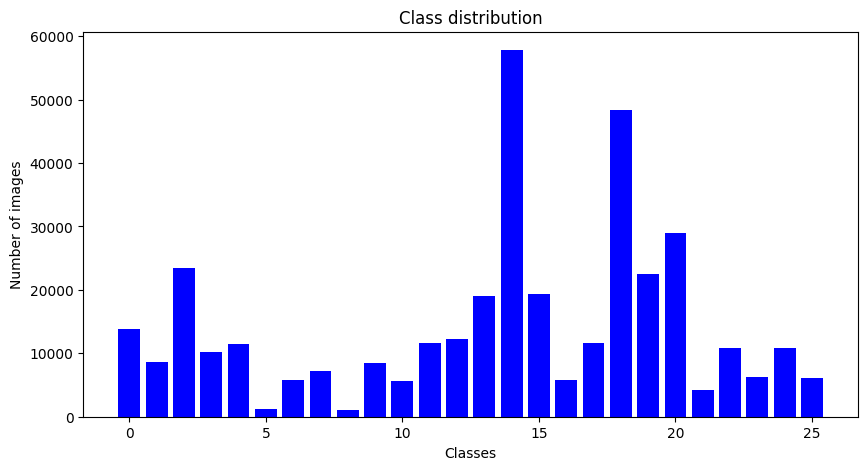

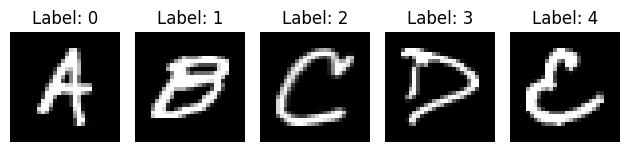

In [1]:
# بسم الله الرحمن الرحيم

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# change this file_path to match your dataset location
print("Loading dataset...")
data = pd.read_csv("A_Z Handwritten Data.csv", header=None)
print("Finished dataset loading")


print("################################## Data exploration and preparation ######################################")
# Extract labels and images
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values

unique_classes, class_counts = np.unique(labels, return_counts=True)
print(f"Number of unique classes: {len(unique_classes)}")
print(f"Classes: {unique_classes}")
print(f"Class Counts: {class_counts}")

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(unique_classes, class_counts, color='blue')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Class distribution')
# plt.show() # uncomment if you want to see :)

# Reshape the image data to 28x28
images = images.reshape(-1, 28, 28)
print(f"Dataset loaded successfully, Total images: {len(images)}")

# Normalize the images
images = images / 255.0
print("Image data normalized successfully!")


unique_labels = np.unique(labels)
plt.figure()
for i, label in enumerate(unique_labels[:5]):  # Visualize first 5 unique classes
    idx = np.where(labels == label)[0][0]      # Get the first index of the label
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx], cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()
# plt.savefig("images.png") # uncomment if you want to save :)

print("################################## First experiment  ######################################")


In [94]:
print(np.where(labels == 3))

(array([45947, 45948, 45949, ..., 56078, 56079, 56080]),)


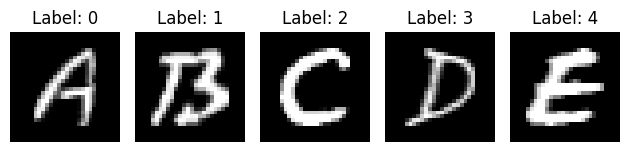

In [123]:
plt.figure()
for i, label in enumerate(unique_labels[:5]):  # Visualize first 5 unique classes
    idx = np.where(labels == label)[0][200]      # Get the first index of the label
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx], cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()

In [75]:
Testing logistic regression model...
Test F1 Score: 0.8487
Confusion Matrix:
[[2753    8   27    0]
 [ 328 1207  233    0]
 [  55   12 4577    0]
 [ 111  191  334  164]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2788
           1       0.85      0.68      0.76      1768
           2       0.89      0.99      0.93      4644
           3       1.00      0.20      0.34       800

    accuracy                           0.87     10000
   macro avg       0.90      0.72      0.74     10000
weighted avg       0.88      0.87      0.85     10000



(372451, 784)


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

one_hot_labels = to_categorical(data.iloc[:, 0].values, num_classes=26)

X_train, X_temp, y_train, y_temp = train_test_split(images, one_hot_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='tanh'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=True)
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=True)

# Plot accuracy and loss curves for both models
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.show()

plot_history(history1, "Model 1")
plot_history(history2, "Model 2")

# Save the best model
best_model = model2 if max(history2.history['val_accuracy']) > max(history1.history['val_accuracy']) else model1
worst_model = model1 if best_model == model2 else model2
best_model.save('best_model.h5')
worst_model.save('worst_model.h5')

# Reload and test the best model
loaded_model = load_model('best_model.h5')

# Evaluate on the test set
y_pred = np.argmax(loaded_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# F1 Score
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

Epoch 1/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8619 - loss: 0.5115 - val_accuracy: 0.9539 - val_loss: 0.1638
Epoch 2/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9615 - loss: 0.1381 - val_accuracy: 0.9655 - val_loss: 0.1235
Epoch 3/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9713 - loss: 0.1016 - val_accuracy: 0.9718 - val_loss: 0.1045
Epoch 4/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9764 - loss: 0.0836 - val_accuracy: 0.9747 - val_loss: 0.0918
Epoch 5/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9787 - loss: 0.0721 - val_accuracy: 0.9710 - val_loss: 0.1031
Epoch 6/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9810 - loss: 0.0643 - val_accuracy: 0.9767 - val_loss: 0.0868
Epoch 7/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9828 - loss: 0.0579 - val_accuracy: 0.9786 - val_loss: 0.0842
Epoch 8/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9845 - loss: 0

In [57]:
print(images[0].shape)

(28, 28)


In [137]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
  img = load_img(path, color_mode='grayscale', target_size=(28, 28))
  img_array = img_to_array(img)
  img_array = 255 - img_array
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  return img_array

def preprocess_image_array(arr):
  print(arr)
  img_array = arr / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  return img_array

load_model = load_model('best_model.h5')
img = preprocess_image('img/d2.png')
# predictions = load_model.predict(preprocess_image_array(images[1099]))
predictions = load_model.predict(img)
print(f"Predictions: {predictions}")
predicted_class = np.argmax(predictions)
print(f"Predicted class: {chr(65 + predicted_class)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predictions: [[5.7311096e-12 1.6348637e-14 1.5844832e-17 9.4698042e-01 4.2903055e-28
  0.0000000e+00 1.7266591e-24 3.8490095e-18 3.0900817e-38 4.8566415e-07
  6.2408037e-15 6.9698101e-12 1.9490389e-15 5.8545847e-04 2.9350509e-04
  7.0094973e-16 2.1098286e-21 4.8482224e-19 6.4352858e-19 1.6866764e-14
  5.2139729e-02 1.6707422e-31 4.9662407e-07 4.6013477e-22 7.0479706e-17
  1.5087562e-24]]
Predicted class: D
